In [1]:
import pickle as pkl
import numpy as np
import networkx as nx

import matplotlib.pyplot as plt

plt.style.use(['science','no-latex'])

In [2]:
def readRes(parameter="beta", model="gnn", diff="SIR"):
    res_path = "../data_process/ws_parameter/{}_{}_{}_results.pkl".format(parameter, diff, model)
    with open(res_path, "rb") as f:
        res = pkl.load(f)
    model_res = [x[0] for x in res]
    dmp_res = [x[1] for x in res]
    return model_res, dmp_res

In [22]:
np.linspace(0.1, 0.4, 11)

array([0.1 , 0.13, 0.16, 0.19, 0.22, 0.25, 0.28, 0.31, 0.34, 0.37, 0.4 ])

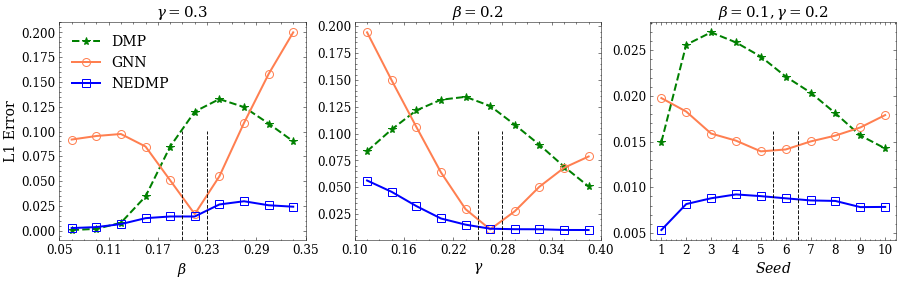

In [26]:
plt.figure(figsize=(15, 4))
fs = 12
lw = 2
nt = 6

# BETA

gnn, dmp = readRes(parameter="beta", model="gnn", diff="SIR")
nedmp, dmp = readRes(parameter="beta", model="nedmp", diff="SIR")
    
beta_gnn_g = [x[0] for x in gnn]
beta_dmp = [x[0] for x in dmp]
beta_nedmp_g = [x[0] for x in nedmp]
    
ax1 = plt.subplot(131)
x = (np.linspace(0.05, 0.35, 11)+0.015)[:10]
ax1.plot(x, beta_dmp,"--", lw=lw, marker="*", markersize=8, label="DMP", c="g")
ax1.plot(x, beta_gnn_g, lw=lw, marker="o", markerfacecolor='none', markersize=8,label="GNN", c="coral")
ax1.plot(x, beta_nedmp_g, lw=lw, marker="s", markerfacecolor='none', markersize=8,label="NEDMP", c="b")

ticks = ["{:.2f}".format(x) for x in np.linspace(0.05, 0.35,nt)]
ax1.set_xticks(np.linspace(0.05, 0.35, nt))
ax1.set_xticklabels(ticks, fontsize=fs)
ax1.legend(fontsize=fs+2, loc="upper left")
ax1.set_xlabel(r"$\beta$", fontsize=fs+2)
ax1.set_ylabel("L1 Error", fontsize=fs+2)
ax1.yaxis.set_tick_params(labelsize=fs)
ax1.set_title(r"$\gamma=0.3$", fontsize=fs+3)
ax1.axvline(0.2, ymax=0.5, ls="--", c="k", alpha=0.9)
ax1.axvline(0.23, ymax=0.5, ls="--", c="k", alpha=0.9)

# GAMMA
gnn, dmp = readRes(parameter="gamma", model="gnn", diff="SIR")
nedmp, dmp = readRes(parameter="gamma", model="nedmp", diff="SIR")
gamma_gnn_g = [x[0] for x in gnn]
gamma_dmp = [x[0] for x in dmp]
gamma_nedmp_g = [x[0] for x in nedmp] 
ax2 = plt.subplot(132)
x = (np.linspace(0.1, 0.4, 11)+0.015)[:10]
ax2.plot(x, gamma_dmp,"--", lw=lw, marker="*", markersize=8, label="DMP", c="g")
ax2.plot(x, gamma_gnn_g, lw=lw, marker="o", markerfacecolor='none',label="node-GNN", markersize=8, c="coral")
ax2.plot(x, gamma_nedmp_g, lw=lw, marker="s", markerfacecolor='none',label="NEDMP", markersize=8, c="b")

ticks = ["{:.2f}".format(x) for x in np.linspace(0.1, 0.4, nt)]
ax2.set_xticks(np.linspace(0.1, 0.4, nt))
ax2.set_xticklabels(ticks, fontsize=fs)
ax2.set_xlabel(r"$\gamma$", fontsize=fs+2)
ax2.yaxis.set_tick_params(labelsize=fs)
ax2.set_title(r"$\beta=0.2$", fontsize=fs+3)
ax2.axvline(0.25, ymax=0.5, ls="--", c="k", alpha=0.9)
ax2.axvline(0.28, ymax=0.5, ls="--", c="k", alpha=0.9)


# Seed 
gnn, dmp = readRes(parameter="seed", model="gnn", diff="SIR")
nedmp, dmp = readRes(parameter="seed", model="nedmp", diff="SIR")
seed_gnn_g = [x[0] for x in gnn]
seed_dmp = [x[0] for x in dmp]
seed_nedmp_g = [x[0] for x in nedmp] 
ax3 = plt.subplot(133)
x = np.linspace(1, 10, 10)
ax3.plot(x, seed_dmp,"--", lw=lw, marker="*", markersize=8, label="DMP", c="g")
ax3.plot(x, seed_gnn_g, lw=lw, marker="o", markerfacecolor='none',label="node-GNN", markersize=8, c="coral")
ax3.plot(x, seed_nedmp_g, lw=lw, marker="s", markerfacecolor='none',label="NEDMP", markersize=8, c="b")

ticks = ["{:.0f}".format(x) for x in np.linspace(1, 10, 10)]
ax3.set_xticks(np.linspace(1, 10, 10))
ax3.set_xticklabels(ticks, fontsize=fs)
ax3.set_xlabel(r"$Seed$", fontsize=fs+2)
ax3.yaxis.set_tick_params(labelsize=fs)
ax3.set_title(r"$\beta=0.1, \gamma=0.2$", fontsize=fs+3)
ax3.axvline(6.5, ymax=0.5, ls="--", c="k", alpha=0.9)
ax3.axvline(5.5, ymax=0.5, ls="--", c="k", alpha=0.9)


plt.savefig("ws_outset_parameter.pdf", bbox_inches='tight')
plt.show()